<a href="https://colab.research.google.com/github/tariqulq-cyber/Pemrosesan-teks-praktek/blob/main/Clustering/Clustering_K_means_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5220411053_MOUHAMMAD TARIQOUL QALAM

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('/content/drive/MyDrive/pemrosesan teks teori/preprocesing_growtopia.csv')
df

,userName,at,content,score,thumbsUpCount,content_processed_FINAL
0,YT•RIZ GANT OFFICIAL,10/21/2025 15:36,game nya susah banget anj cuman buat login bik...,1,0,game susah banget anjing cuman login akun suli...
1,Bang Rama,10/21/2025 14:57,🤑,5,0,NaN
2,muhammad ridho official,10/21/2025 14:42,not good,1,0,not good
3,Fatur Rahman,10/21/2025 13:56,bagus,5,0,bagus
4,rmdn ballboy,10/21/2025 13:23,i really love this game but i'm always disappo...,1,0,really love this game but im always disappoint...
...,...,...,...,...,...,...
945,yohanes okky,9/24/2025 10:35,gem sampah,1,0,game sampah
946,Pradipta Wicaksono,9/24/2025 10:11,bagus dan seru aku suka,5,0,bagus seru suka
947,Rahman Latip,9/24/2025 9:54,fix try login again,1,0,fix try login again
948,Fajri Nur Rohman,9/24/2025 7:36,apalah kalo pake wifi ercon mulu kalo pake dat...,5,0,apa wifi ercon mulu data ercon


**clutering k-means**

1. Pemilihan Fitur dan Persiapan Data
Pertama, kita akan memilih kolom numerik yang sesuai untuk pengelompokan. Dalam dataset ini, score dan thumbsUpCount adalah kandidat yang baik. Kita juga akan menangani nilai yang hilang dan menskalakan data, yang penting untuk K-means karena berbasis jarak.

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih fitur untuk pengelompokan
features = ['score', 'thumbsUpCount']
X = df[features].copy()


X = X.fillna(X.mean())

# Skalakan fiturnya
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled data:")
print(X_scaled[:5])

First 5 rows of scaled data:
[[-0.65307635 -0.10541206]
 [ 1.71947636 -0.10541206]
 [-0.65307635 -0.10541206]
 [ 1.71947636 -0.10541206]
 [-0.65307635 -0.10541206]]


2. Menentukan Jumlah Klaster Optimal (Metode Siku)
Untuk menemukan jumlah klaster yang sesuai (k), kita dapat menggunakan Metode Siku. Ini melibatkan penghitungan Jumlah Kuadrat Dalam Klaster (WCSS) untuk berbagai nilai k dan mencari titik 'siku' di mana penurunan WCSS mulai melambat.

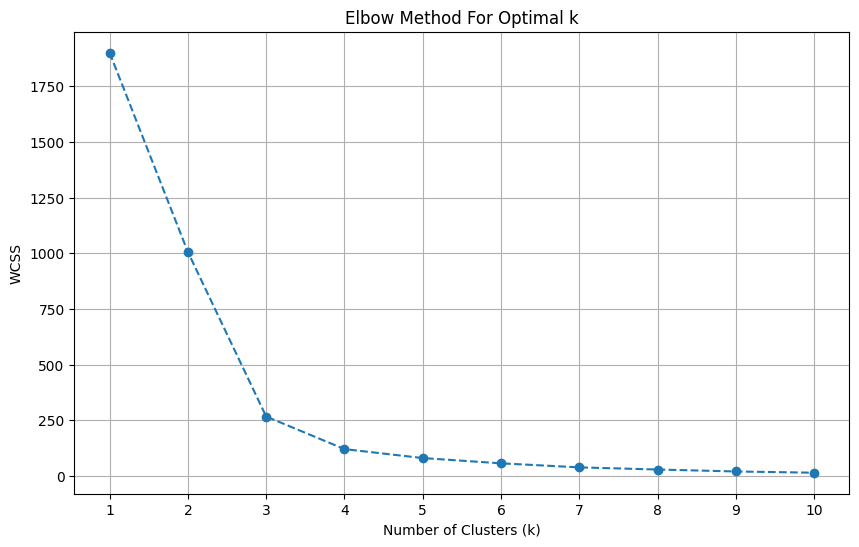

In [90]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

3. Menerapkan Pengelompokan K-Means
Berdasarkan Metode Elbow (atau k yang dipilih), kita sekarang akan menerapkan pengelompokan K-means pada data yang telah diskalakan dan menambahkan label klaster kembali ke DataFrame asli kita.

In [91]:
n_clusters = 3 # Contoh: Pilih k=3 atau k=4 jika siku tidak terhalang

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

print(f"Value counts for {n_clusters} clusters:")
display(df['cluster'].value_counts().sort_index())

Value counts for 3 clusters:


,count
cluster,
0,271
1,678
2,1


### 4. Visualisasikan Klaster

Terakhir, mari kita visualisasikan klaster menggunakan fitur asli untuk memahami distribusinya.

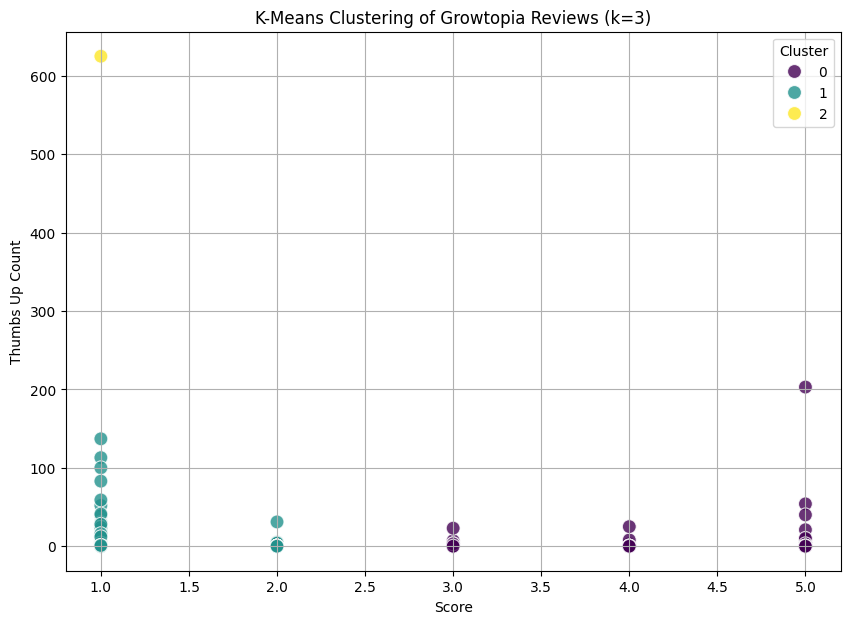

In [92]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='score', y='thumbsUpCount', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'K-Means Clustering of Growtopia Reviews (k={n_clusters})')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

**clustring topic modeling**

## Persiapan Data untuk Pemodelan Topik

### Subtask:
Memuat data, menangani nilai yang hilang di kolom teks (`content_processed_FINAL`), dan melakukan pra-pemrosesan teks seperti tokenisasi, penghapusan *stopwords*, dan lemmatisasi menggunakan NLTK. Pastikan kolom 'content_processed_FINAL' sudah bersih dan siap.


In [93]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
print("NLTK packages downloaded successfully.")

NLTK packages downloaded successfully.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Tangani nilai yang hilang di 'content_processed_FINAL'
df['content_processed_FINAL'] = df['content_processed_FINAL'].fillna('')

# Inisialisasi komponen NLTK
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Mendefinisikan fungsi pra-pemrosesan teks
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Hapus tanda baca dan karakter non-alfabet, serta stopwords
    processed_tokens = []
    for token in tokens:
        # Hapus tanda baca
        token = ''.join(char for char in token if char not in string.punctuation)

        # Hapus karakter non-alfabet dan periksa apakah itu stopword
        if token.isalpha() and token not in stop_words:
            processed_tokens.append(lemmatizer.lemmatize(token))

    return ' '.join(processed_tokens)

# Terapkan fungsi pra-pemrosesan
df['processed_text'] = df['content_processed_FINAL'].apply(preprocess_text)

print("First 5 rows of 'content_processed_FINAL' and 'processed_text':")
print(df[['content_processed_FINAL', 'processed_text']].head())

First 5 rows of 'content_processed_FINAL' and 'processed_text':
                             content_processed_FINAL  \
0  game susah banget anjing cuman login akun suli...   
1                                                      
2                                           not good   
3                                              bagus   
4  really love this game but im always disappoint...   

                                      processed_text  
0  game susah banget anjing cuman login akun suli...  
1                                                     
2                                               good  
3                                              bagus  
4  really love game im always disappointed system...  


## Pembentukan Kamus dan Korpus

### Subtask:
Membuat kamus (dictionary) dan korpus (bag-of-words) dari teks yang telah diproses, yang merupakan format input yang diperlukan untuk model LDA (Latent Dirichlet Allocation).


In [95]:
import sys
!{sys.executable} -m pip install gensim

from gensim import corpora

# Buat daftar dokumen yang telah di-tokenisasi
tokenized_docs = [doc.split() for doc in df['processed_text'] if doc.strip()]

# Buat Kamus Gensim
dictionary = corpora.Dictionary(tokenized_docs)

print("Number of unique tokens in dictionary:", len(dictionary))
print("First 10 dictionary mappings:", list(dictionary.items())[:10])

Number of unique tokens in dictionary: 1851
First 10 dictionary mappings: [(0, 'akun'), (1, 'anjing'), (2, 'banget'), (3, 'cuman'), (4, 'game'), (5, 'konfl'), (6, 'login'), (7, 'sulit'), (8, 'susah'), (9, 'good')]


membuat korpus bag-of-words (matriks dokumen-istilah) dari dokumen yang telah di-tokenisasi menggunakan metode `doc2bow` dari kamus tersebut.

In [96]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

print("First 5 documents in corpus (bag-of-words format):")
print(corpus[:5])

First 5 documents in corpus (bag-of-words format):
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1)], [(10, 1)], [(4, 1), (6, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(1, 1), (25, 1)]]


## Penerapan Pemodelan Topik LDA

### Subtask:
Melatih model Latent Dirichlet Allocation (LDA) pada korpus untuk mengidentifikasi topik-topik tersembunyi dalam ulasan. Akan ditentukan jumlah topik yang masuk akal untuk model.


In [97]:
from gensim.models import LdaModel

# Tentukan jumlah topik (dapat disesuaikan setelah pemeriksaan awal)
num_topics = 5

# Melatih model LDA
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    per_word_topics=True
)

# Print the topics
print(f"LDA Model with {num_topics} Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic: {idx} \nWords: {topic}\n")

LDA Model with 5 Topics:
Topic: 0 
Words: 0.079*"game" + 0.040*"login" + 0.027*"baik" + 0.026*"tolong" + 0.022*"main" + 0.019*"susah" + 0.019*"server" + 0.015*"bot" + 0.014*"masuk" + 0.012*"player"

Topic: 1 
Words: 0.047*"login" + 0.022*"main" + 0.020*"akun" + 0.017*"please" + 0.016*"fix" + 0.015*"vpn" + 0.015*"server" + 0.014*"cant" + 0.014*"ban" + 0.013*"loading"

Topic: 2 
Words: 0.099*"game" + 0.035*"server" + 0.027*"login" + 0.012*"bot" + 0.012*"susah" + 0.010*"bagus" + 0.009*"akun" + 0.009*"vpn" + 0.009*"banget" + 0.008*"bad"

Topic: 3 
Words: 0.058*"login" + 0.032*"game" + 0.015*"bagus" + 0.014*"server" + 0.013*"fix" + 0.011*"udah" + 0.008*"update" + 0.008*"servernya" + 0.008*"try" + 0.007*"good"

Topic: 4 
Words: 0.036*"game" + 0.033*"login" + 0.032*"server" + 0.028*"bot" + 0.015*"bagus" + 0.012*"ban" + 0.012*"mulu" + 0.009*"benerin" + 0.009*"lag" + 0.008*"ercon"



## Ekstraksi Distribusi Topik Dokumen

### Subtask:
Setelah model LDA dilatih, setiap dokumen (ulasan) akan memiliki distribusi probabilitas di seluruh topik. Distribusi ini akan diekstraksi dan digunakan sebagai fitur numerik untuk algoritma clustering.


In [98]:
import numpy as np
import pandas as pd

# 1. Lakukan iterasi melalui korpus untuk mendapatkan distribusi topik untuk setiap dokumen
document_topic_distributions = []
for doc_bow in corpus:

    # Dapatkan distribusi topik untuk dokumen saat ini
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0) # Pastikan semua topik disertakan dengan probabilitas 0 jika belum ada

    # Buat vektor berukuran num_topics untuk dokumen saat ini
    topic_vector = [0.0] * num_topics
    for topic_id, prob in doc_topics:
        topic_vector[topic_id] = prob
    document_topic_distributions.append(topic_vector)

# 2. Konversi daftar distribusi topik menjadi array NumPy
# Ini juga menangani kasus di mana tokenized_docs mungkin memiliki string kosong
# Kita perlu memastikan bahwa untuk dokumen kosong (yang menghasilkan daftar kosong di tokenized_docs),
# entri yang sesuai di document_topic_distributions akan berupa vektor nol.
# Namun, logika saat ini untuk `document_topic_distributions` hanya akan memiliki entri
# untuk `tokenized_docs` yang tidak kosong. Kita perlu menyelaraskan ini dengan DataFrame `df` asli.

# Buat ulang daftar distribusi topik untuk semua dokumen asli, termasuk yang memiliki processed_text kosong
all_document_topic_distributions = []
empty_doc_vector = [0.0] * num_topics

doc_idx = 0
for _, row in df.iterrows():
    if row['processed_text'].strip():
       # Gunakan document_topic_distributions yang telah dihitung sebelumnya jika teks telah diproses
        all_document_topic_distributions.append(document_topic_distributions[doc_idx])
        doc_idx += 1
    else:
        # Untuk teks yang diproses kosong, tetapkan vektor nol
        all_document_topic_distributions.append(empty_doc_vector)

# Konversi ke array NumPy
doc_topic_dist_array = np.array(all_document_topic_distributions)

# 3. Buat DataFrame Pandas dari array NumPy distribusi topik
# Nama kolom akan berupa 'topic_0', 'topic_1', dan seterusnya.
doc_topic_dist = pd.DataFrame(doc_topic_dist_array, columns=[f'topic_{i}' for i in range(num_topics)])

# 4. Print the head of the doc_topic_dist DataFrame
print("Header dari DataFrame Distribusi Topik Dokumen:")
display(doc_topic_dist.head())

Header dari DataFrame Distribusi Topik Dokumen:


,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.018507,0.018673,0.925871,0.018548,0.018401
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.100003,0.101114,0.100733,0.597602,0.100549
3,0.101200,0.100004,0.102802,0.591473,0.104520
4,0.012044,0.951732,0.012242,0.011959,0.012024


## Menentukan Jumlah Klaster Optimal (Metode Siku)

### Subtask:
Menggunakan Metode Siku pada distribusi topik yang telah diekstraksi untuk menentukan jumlah klaster `k` yang optimal untuk algoritma K-Means.


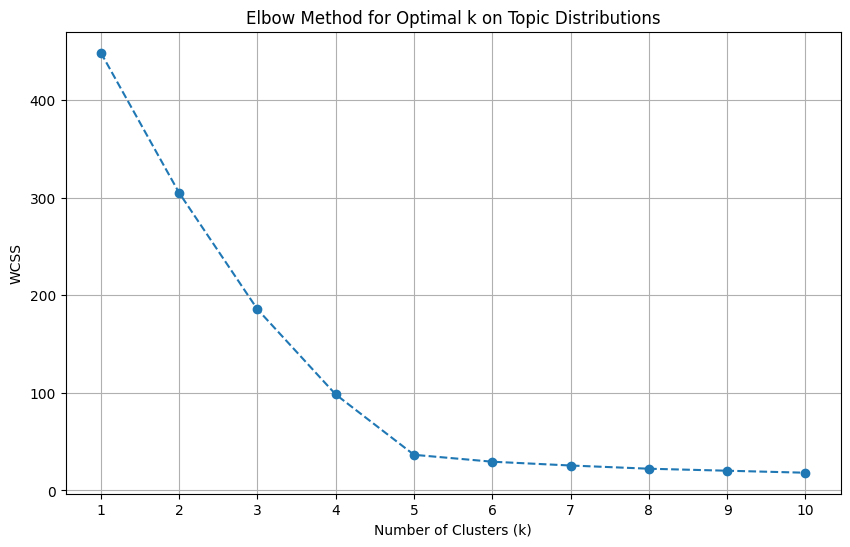

In [100]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Inisialisasi daftar kosong untuk menyimpan nilai WCSS
wcss = []

# Lakukan perulangan melalui rentang kemungkinan nomor kluster (misalnya, dari 1 hingga 10)
# Biasanya diuji hingga 10-15 kluster, mari kita gunakan 10 untuk demonstrasi
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10, # Atur n_init secara eksplisit seperti yang direkomendasikan oleh scikit-learn
        random_state=42
    )
    kmeans.fit(doc_topic_dist) # Sesuaikan dengan DataFrame distribusi dokumen-topik
    wcss.append(kmeans.inertia_)

# Plot nilai WCSS terhadap jumlah klaster (k)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k on Topic Distributions')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Penerapan Pengelompokan K-Means pada Distribusi Topik

### Subtask:
Melakukan K-Means clustering pada fitur distribusi topik menggunakan jumlah klaster optimal yang telah ditentukan. Label klaster akan ditambahkan kembali ke DataFrame asli (`df`).


In [101]:
from sklearn.cluster import KMeans

#1. Identifikasi jumlah klaster optimal (k) dari plot Metode Elbow.
# Berdasarkan plot di sel b68c18c1, mari kita pilih k=4 sebagai titik siku yang wajar.
# Pengguna dapat menyesuaikan nilai ini berdasarkan interpretasi mereka terhadap plot.
optimal_k = 4

# 2. Buat instance model KMeans
kmeans_lda = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42
)

# 3. Terapkan model KMeans pada DataFrame doc_topic_dist dan prediksi label klaster.
topic_clusters = kmeans_lda.fit_predict(doc_topic_dist)

# 4. Tambahkan label klaster ini sebagai kolom baru bernama 'topic_cluster' ke DataFrame asli df.
df['topic_cluster'] = topic_clusters

# 5. Tampilkan jumlah nilai dari kolom 'topic_cluster' yang baru dibuat.
print(f"Value counts for {optimal_k} topic clusters:")
display(df['topic_cluster'].value_counts().sort_index())

Value counts for 4 topic clusters:


,count
topic_cluster,
0,258
1,278
2,170
3,244


## Analisis dan Visualisasi Klaster

### Subtask:
Menganalisis karakteristik setiap klaster dengan melihat topik dominan di dalamnya, dan memvisualisasikan klaster menggunakan teknik reduksi dimensi.


Mean topic distribution for each cluster:


,topic_0,topic_1,topic_2,topic_3,topic_4
topic_cluster,,,,,
0,0.068897,0.049113,0.788858,0.047386,0.045746
1,0.817250,0.041724,0.049530,0.047682,0.043814
2,0.050474,0.040469,0.042825,0.035614,0.830617
3,0.056863,0.450591,0.044599,0.361637,0.057621


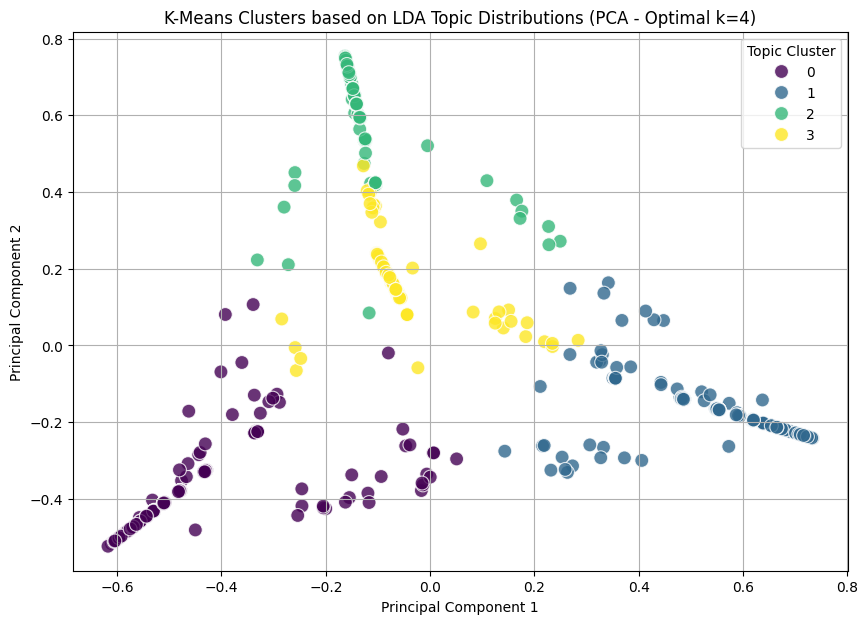

In [102]:
from sklearn.decomposition import PCA

# Merge topic distributions into the main DataFrame
df = pd.concat([df, doc_topic_dist], axis=1)

# 1. Analyze cluster characteristics by looking at dominant topics
print("Mean topic distribution for each cluster:")
cluster_topic_means = df.groupby('topic_cluster')[[f'topic_{i}' for i in range(num_topics)]].mean()
display(cluster_topic_means)

# 2. & 3. Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(doc_topic_dist)

# 4. Add PCA components as new columns to df
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

# 5. & 6. Visualize clusters using scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='topic_cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title(f'K-Means Clusters based on LDA Topic Distributions (PCA - Optimal k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Topic Cluster')
plt.show()

## penjelasan
Memberikan gambaran temuan dari clustering berdasarkan topik, menjelaskan karakteristik setiap klaster, dan memberikan wawasan berdasarkan hasil analisis.

## Ringkasan:

### Temuan Utama Analisis Data

*   **Prasunting Teks:** Nilai yang hilang dalam kolom `content_processed_FINAL` telah ditangani. Teks di-tokenize, dikonversi ke huruf kecil, tanda baca dan karakter non-alfabet dihapus, kata-kata stop English disaring, dan kata-kata dilematisasi, menghasilkan kolom `processed_text` yang siap untuk pemodelan.
*   **Pembuatan Korpus:** Kamus Gensim yang berisi 1851 token unik dibuat, beserta korpus bag-of-words dari teks yang diproses.
*   **Pemodelan Topik LDA:** Model Latent Dirichlet Allocation (LDA) dilatih dengan 5 topik, mengungkapkan tema-tema yang berbeda:
    *   **Topik 0:** Masalah umum permainan, termasuk login, masalah server, dan gameplay.
    *   **Topik 1:** Masalah login dan akun, permintaan perbaikan, dan masalah konektivitas.
    *   **Topik 2:** Masalah game, server, dan login yang lebih luas, terkadang menyebutkan bot dan pengalaman negatif secara keseluruhan.
    *   **Topik 3:** Masalah login dan kualitas game, termasuk aspek positif dan mention tentang pembaruan atau perbaikan.
    *   **Topik 4:** Masalah game, login, dan server, khususnya menyebutkan bot, banned, dan masalah kinerja seperti lag.
*   **Distribusi Dokumen-Topik:** Distribusi probabilitas setiap dokumen di seluruh 5 topik LDA diekstraksi dan disimpan dalam DataFrame, `doc_topic_dist`, yang berfungsi sebagai fitur untuk pengelompokan.
*   **Penentuan Kluster Optimal:** Metode Elbow menunjukkan jumlah kluster optimal 4 (`k=4`) untuk pengelompokan K-Means.
*   **Pengelompokan K-Means:** Pengelompokan K-Means diterapkan, dengan setiap dokumen ditugaskan ke salah satu dari empat kluster. Distribusi dokumen di antara kluster-kluster ini adalah: Kluster 0 (258 dokumen), Kluster 1 (278 dokumen), Kluster 2 (170 dokumen), dan Kluster 3 (244 dokumen).
*   **Ciri-ciri Kluster:** Analisis distribusi topik rata-rata di setiap kluster mengungkapkan tema dominan mereka:
    *   **Kluster 0** didominasi oleh **Topik 2** (probabilitas rata-rata ~0,789), menunjukkan fokus pada pengalaman negatif umum terkait game, server, dan login.
    *   **Kluster 1** sangat didominasi oleh **Topik 0** (probabilitas rata-rata ~0,817), menunjukkan konten terkait masalah umum permainan, kesulitan login, dan masalah server.
    *   **Kluster 2** sangat dipengaruhi oleh **Topik 4** (probabilitas rata-rata ~0,831), menunjuk pada pembahasan tentang masalah game, login, server, bot, larangan, dan lag kinerja.
    *   **Cluster 3** menunjukkan dominasi campuran antara **Topik 1** (probabilitas rata-rata ~0,451) dan **Topik 3** (probabilitas rata-rata ~0,362), menggabungkan elemen masalah login/akun dengan mention tentang kualitas game, pembaruan, dan perbaikan.
*   **Visualisasi:** Analisis Komponen Utama (PCA) berhasil mengurangi distribusi topik menjadi 2 komponen, memungkinkan visualisasi 2D yang jelas dari kluster yang berbeda.

### Wawasan atau Langkah Selanjutnya

*   **Interpretasi Tema Kluster:** Setiap kluster mewakili kelompok umpan balik pengguna yang berbeda berdasarkan topik LDA yang mendasarinya. Misalnya, Kluster 2 kemungkinan mengelompokkan keluhan tentang kinerja teknis dan masalah bot/ban, sementara Kluster 3 mungkin mewakili campuran masalah login dan beberapa umpan balik positif atau diskusi pembaruan. Tema-tema ini dapat menjadi panduan untuk perbaikan yang ditargetkan atau strategi komunikasi.
*   **Integrasikan dengan Data Lain:** Untuk mendapatkan wawasan yang lebih dalam, hubungkan kluster topik ini dengan metadata lain yang tersedia, seperti penilaian pengguna, skor sentimen, atau cap waktu ulasan. Hal ini dapat mengungkapkan apakah kluster tertentu terkait dengan penilaian yang lebih rendah, sentimen negatif, atau muncul setelah pembaruan game tertentu, memberikan wawasan yang dapat ditindaklanjuti untuk pengembangan produk atau dukungan pelanggan.


Translated with DeepL.com (free version)